In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
df=pd.read_csv("C:/Users/saran/Downloads/DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
df.head(15)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [3]:
df.shape

(10692, 13)

In [4]:
df.isnull().sum()     # checking for null values

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


## Univariate analysis


In [6]:
def seperate_data_types(df):                        
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<40:
            
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous = seperate_data_types(df)

table=[categorical,continuous]
print(tabulate({"Categorical":categorical,
              "Continuous":continuous},headers=["cattegorical","continuous"]))

cattegorical    continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [7]:
def info(col):
    print(df[col].describe())

In [8]:
def plot(col):
    value_counts=df[col].value_counts()
    plt.figure(figsize=(8,5))
    plt.bar(value_counts.index,value_counts.values)
    plt.title(f"value count of {col}")
    
    per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(10,6))
    plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
    plt.title(f"percentage of {col}")
    

In [9]:
def graph(col):
    info(col)
    plot(col)

count         10692
unique            5
top       São Paulo
freq           5887
Name: city, dtype: object


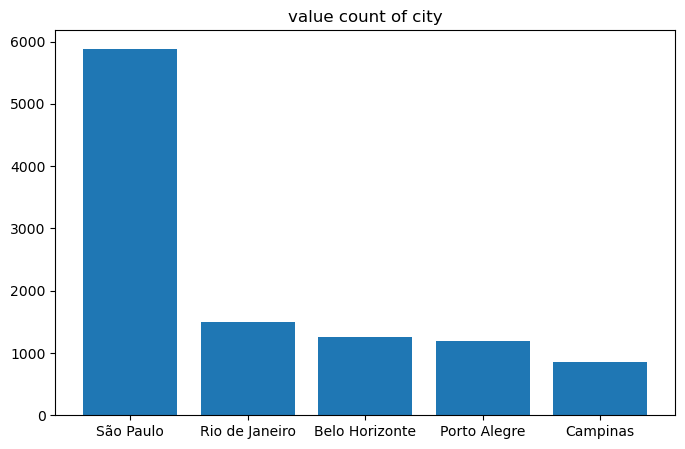

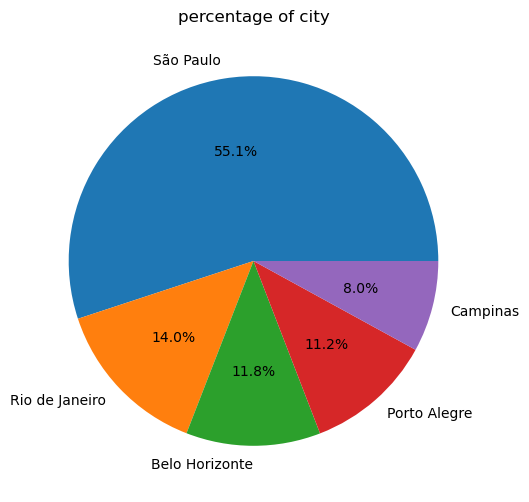

In [10]:
graph('city')

###### The sao Paulo appears to have the most options

In [11]:
#graph('rooms')

In [12]:
df['rooms'].value_counts()

3     3269
2     2975
1     2454
4     1586
5      288
6       68
7       36
8       11
10       3
13       1
9        1
Name: rooms, dtype: int64

In [13]:
df.loc[df['rooms']>8,'rooms']=9  # replacing the extreme impractical values with less frequent value to treat the data

count    10692.000000
mean         2.505425
std          1.166869
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64


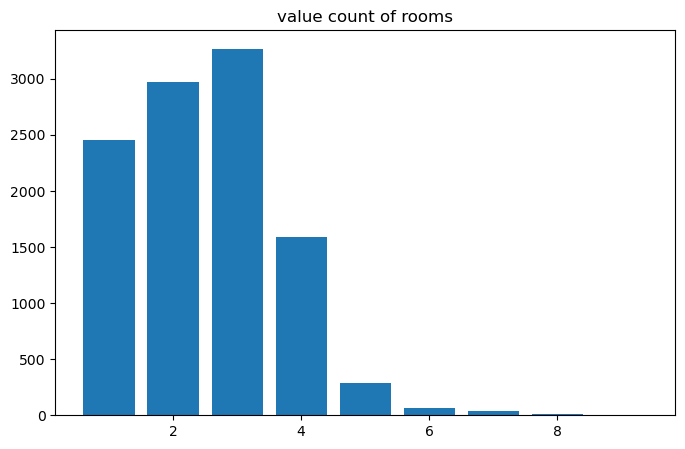

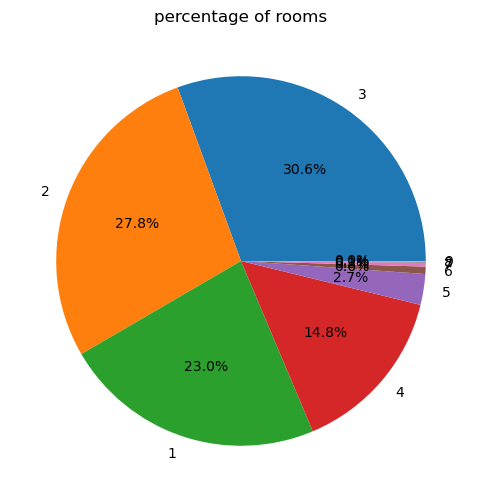

In [14]:
graph('rooms')

###### More number of house options are avialble for houses with 1-4 rooms.

count    10692.000000
mean         2.236813
std          1.407198
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64


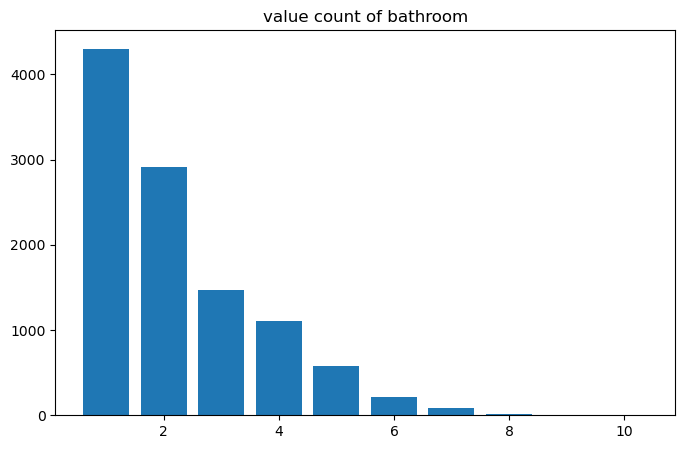

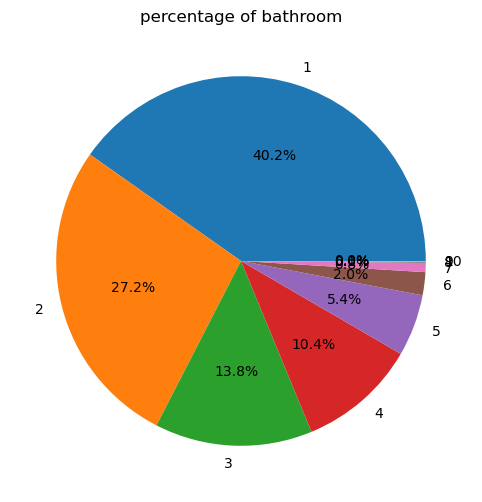

In [15]:
graph('bathroom')

##### Corresponding to the number of rooms most options are available for houses with1-4 bathrooms

In [16]:
#graph('floor')

In [17]:
#df['floor'].value_counts()

In [18]:
df.loc[df['floor']>35,'floor']=35

count    10692.000000
mean         5.040591
std          5.342137
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         35.000000
Name: floor, dtype: float64


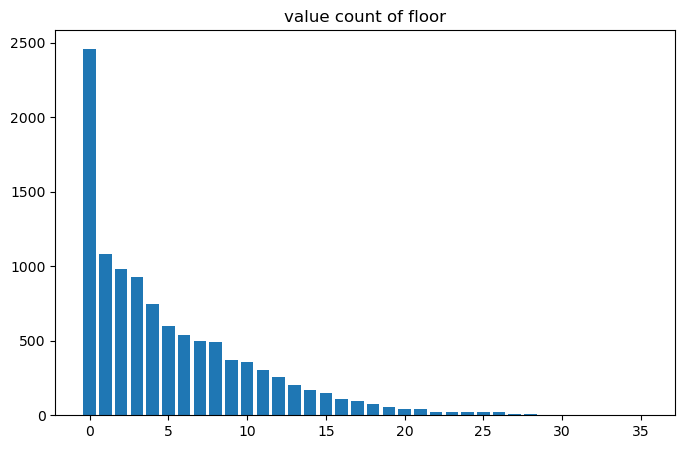

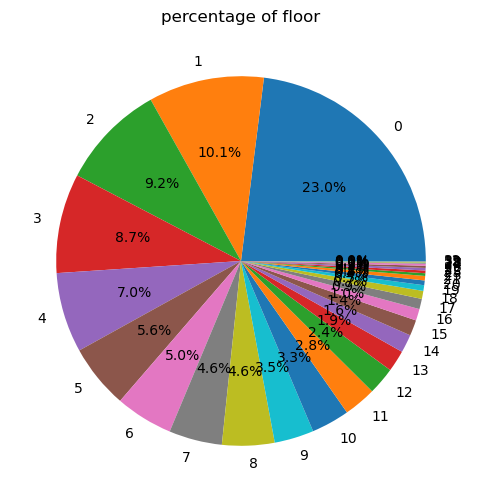

In [19]:
graph('floor')

##### Highest number of houses are available on floor 0

In [20]:
#graph('parking spaces')

In [21]:
df.loc[df['parking spaces']>8,'parking spaces']=8

count    10692.000000
mean         1.608399
std          1.585801
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: parking spaces, dtype: float64


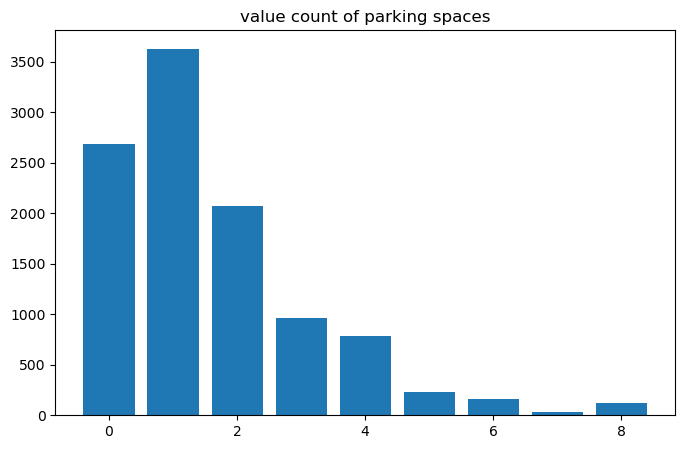

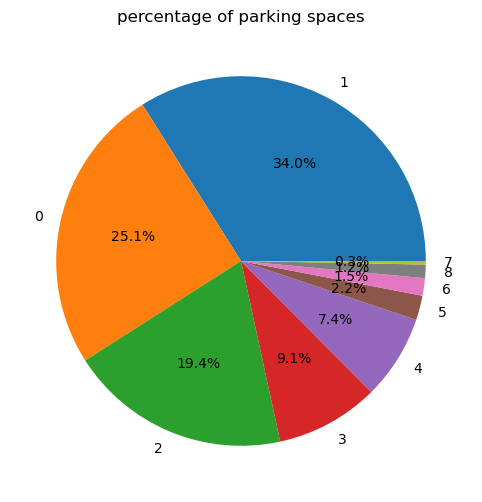

In [22]:
graph('parking spaces')

##### More options are available for houses with no parking spaces and 1-2 parking spaces

count     10692
unique        2
top       acept
freq       8316
Name: animal, dtype: object


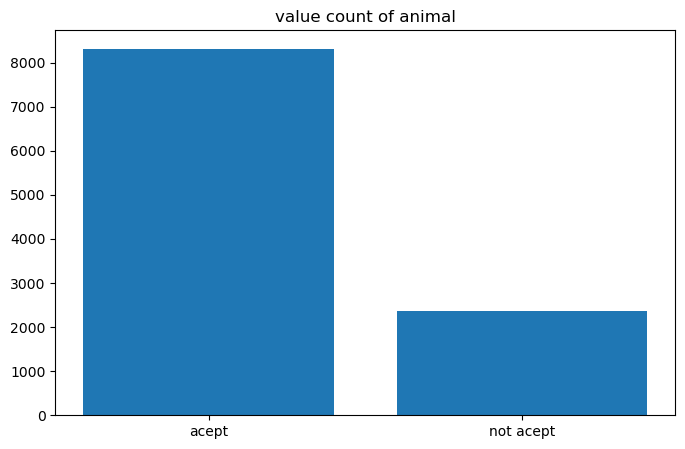

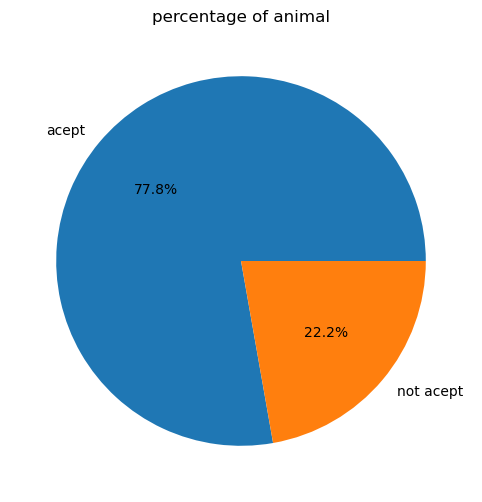

In [23]:
graph('animal')

###### Most houses allow pets

count             10692
unique                2
top       not furnished
freq               8086
Name: furniture, dtype: object


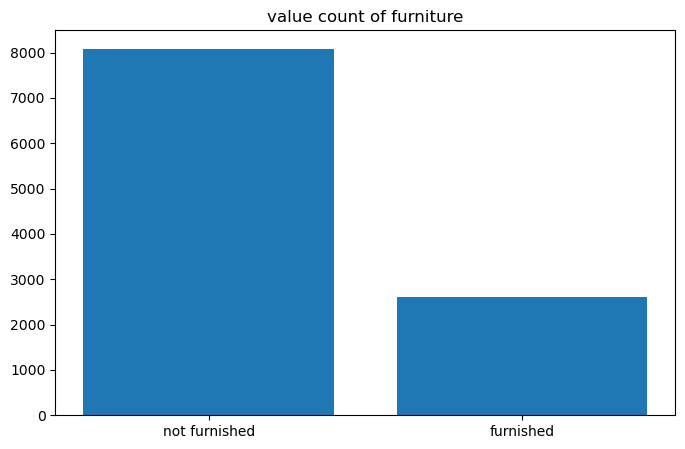

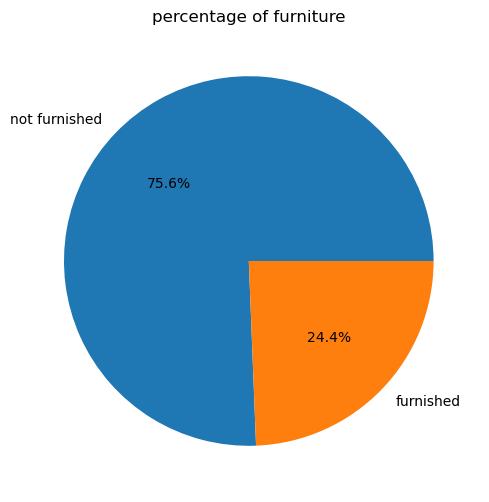

In [24]:
graph('furniture')

##### Most houses are not furnished

### Numerical columns

In [25]:
def num_info(col):
    info=df[col].describe()
    print(info)
    print(f"median of {col}:{df[col].median()}")
    print(f"mode of {col}:{df[col].mode()[0]}")
    print(f"missing values count for {col}:{df[col].isnull().sum()}")
    print(f"skewness of {col}:{df[col].skew()}")
    print(f"kurtosis of {col}:{df[col].kurt()}")

In [26]:
def num_plot(col):
    fig,ax=plt.subplots(2,1,figsize=(8,6))
    ax[0].hist(df[col])
    
    sns.boxplot(y=df[col],ax=ax[1])
    

In [27]:
def num_graph(col):
    num_info(col)
    num_plot(col)

In [28]:
#num_graph('area')

In [29]:
q1=df["area"].quantile(0.25)
q3=df["area"].quantile(0.75)    # calculating upper and lower fence
iqr=q3-q1
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)

371.0
-133.0


In [30]:
df.loc[df['area']>uf,'area']=df['area'].median()
df.loc[df['area']<lf,'area']=df['area'].median()     # treating the outliers

count    10692.000000
mean       114.426581
std         80.495693
min         11.000000
25%         56.000000
50%         90.000000
75%        150.000000
max        370.000000
Name: area, dtype: float64
median of area:90.0
mode of area:90
missing values count for area:0
skewness of area:1.2562484488460723
kurtosis of area:0.7830873659373467


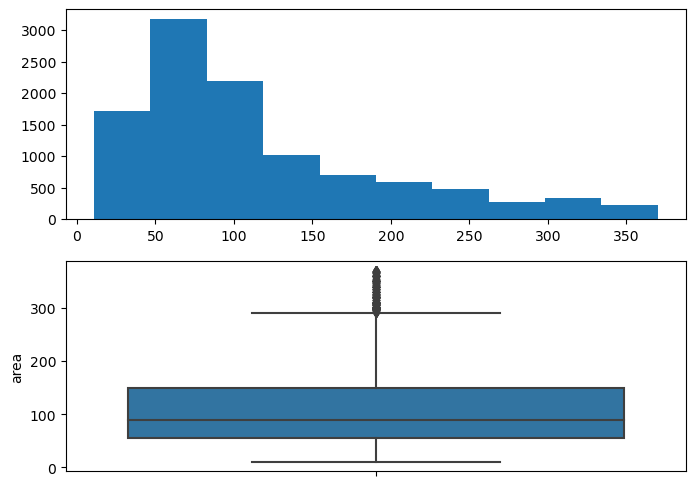

In [31]:
num_graph('area')

In [32]:
#num_graph('hoa (R$)')

In [33]:
q1=df["hoa (R$)"].quantile(0.25)
q3=df["hoa (R$)"].quantile(0.75)
iqr=q3-q1
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)

2838.75
-1431.25


In [34]:
df.loc[df['hoa (R$)']>uf,'hoa (R$)']=df['hoa (R$)'].median()
df.loc[df['hoa (R$)']<lf,'hoa (R$)']=df['hoa (R$)'].median()

count    10692.000000
mean       684.176487
std        668.443093
min          0.000000
25%        170.000000
50%        560.000000
75%        978.000000
max       2835.000000
Name: hoa (R$), dtype: float64
median of hoa (R$):560.0
mode of hoa (R$):0
missing values count for hoa (R$):0
skewness of hoa (R$):1.1820840981810898
kurtosis of hoa (R$):0.790877084640198


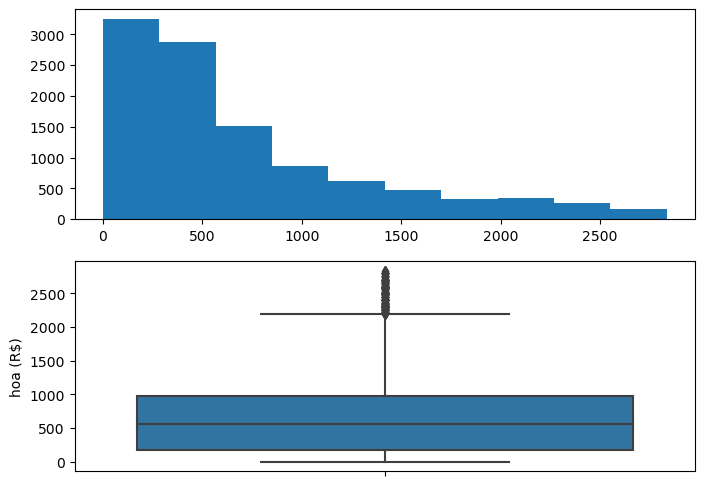

In [35]:
num_graph('hoa (R$)')

In [36]:
#num_graph('rent amount (R$)')

In [37]:
q1=df["rent amount (R$)"].quantile(0.25)   # although all the values are genuine listed values and 
q3=df["rent amount (R$)"].quantile(0.75)       #ideally should be considered fro analysis , we are taking trying to treat the
iqr=q3-q1                                      #extreme high and low values which are very less frequent fr better visual analysis
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)                                            


10205.0
-3675.0


In [38]:
df.loc[df['rent amount (R$)']>uf,'rent amount (R$)']=df['rent amount (R$)'].median()
df.loc[df['rent amount (R$)']<lf,'rent amount (R$)']=df['rent amount (R$)'].median()

count    10692.000000
mean      3183.769173
std       2222.330487
min        450.000000
25%       1530.000000
50%       2660.500000
75%       4000.000000
max      10200.000000
Name: rent amount (R$), dtype: float64
median of rent amount (R$):2660.5
mode of rent amount (R$):2661.0
missing values count for rent amount (R$):0
skewness of rent amount (R$):1.3069307486179944
kurtosis of rent amount (R$):1.0616778980833046


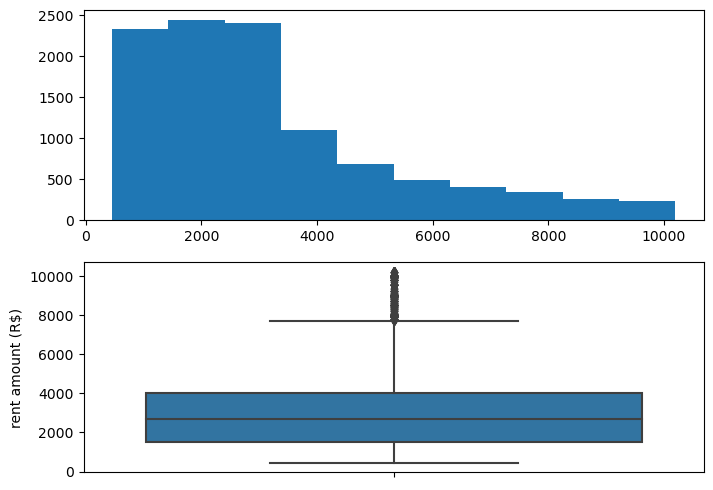

In [39]:
num_graph('rent amount (R$)')

In [40]:
#num_graph('property tax (R$)')

In [41]:
q1=df["property tax (R$)"].quantile(0.25)
q3=df["property tax (R$)"].quantile(0.75)
iqr=q3-q1
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)

880.5
-467.5


In [42]:
df.loc[df['property tax (R$)']>uf,'property tax (R$)']=df['property tax (R$)'].median()
df.loc[df['property tax (R$)']<lf,'property tax (R$)']=df['property tax (R$)'].median()

count    10692.000000
mean       175.791339
std        196.264070
min          0.000000
25%         38.000000
50%        125.000000
75%        239.000000
max        880.000000
Name: property tax (R$), dtype: float64
median of property tax (R$):125.0
mode of property tax (R$):0
missing values count for property tax (R$):0
skewness of property tax (R$):1.6093219785672295
kurtosis of property tax (R$):2.058886251851202


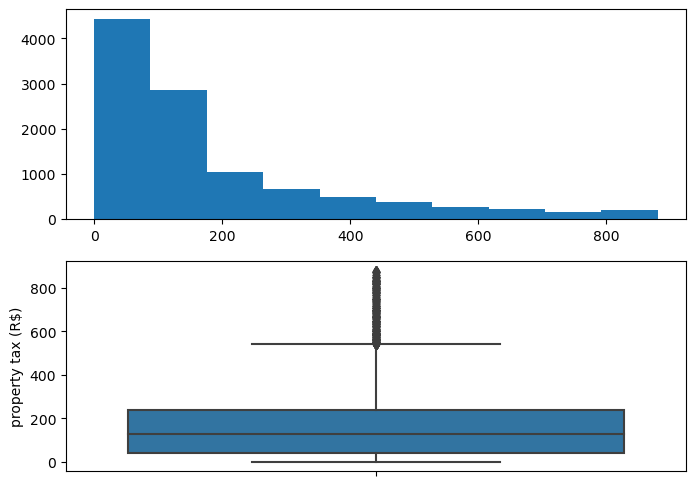

In [43]:
num_graph('property tax (R$)')

In [44]:
#num_graph('total (R$)')

In [45]:
q1=df["total (R$)"].quantile(0.25)
q3=df["total (R$)"].quantile(0.75)
iqr=q3-q1
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)

13827.375
-4997.625


In [46]:
df.loc[df['total (R$)']>uf,'total (R$)']=df['total (R$)'].median()
df.loc[df['total (R$)']<lf,'total (R$)']=df['total (R$)'].median()

count    10692.000000
mean      4289.976244
std       2980.824957
min        499.000000
25%       2061.750000
50%       3581.250000
75%       5536.000000
max      13820.000000
Name: total (R$), dtype: float64
median of total (R$):3581.25
mode of total (R$):3581.5
missing values count for total (R$):0
skewness of total (R$):1.2401114289206254
kurtosis of total (R$):0.8271908554895004


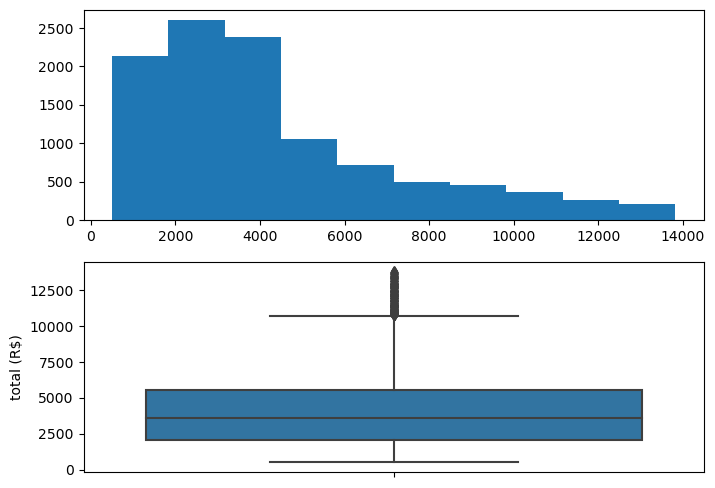

In [47]:
num_graph('total (R$)')

In [48]:
#num_graph("fire insurance (R$)")

In [49]:
q1=df["fire insurance (R$)"].quantile(0.25)
q3=df["fire insurance (R$)"].quantile(0.75)
iqr=q3-q1
uf=q3 + 1.5*iqr
lf=q1-1.5*iqr
print(uf)
print(lf)

138.5
-49.5


In [50]:
df.loc[df['fire insurance (R$)']>uf,'fire insurance (R$)']=df['fire insurance (R$)'].median()
df.loc[df['fire insurance (R$)']<lf,'fire insurance (R$)']=df['fire insurance (R$)'].median()

count    10692.000000
mean        42.351945
std         29.236182
min          3.000000
25%         21.000000
50%         36.000000
75%         54.000000
max        138.000000
Name: fire insurance (R$), dtype: float64
median of fire insurance (R$):36.0
mode of fire insurance (R$):36
missing values count for fire insurance (R$):0
skewness of fire insurance (R$):1.3142172264585248
kurtosis of fire insurance (R$):1.1027158714593912


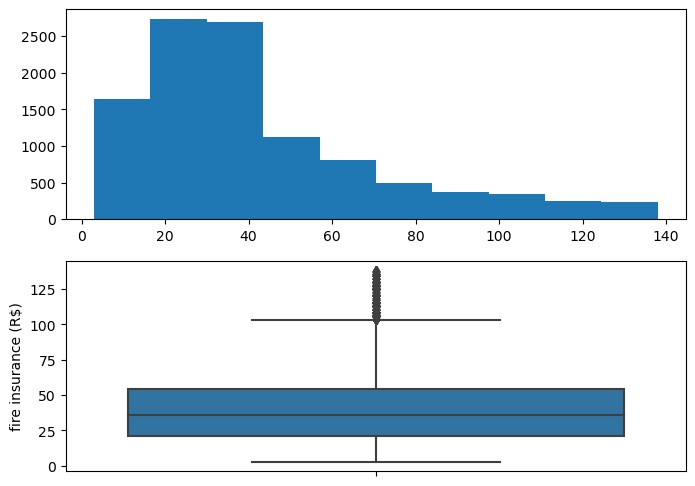

In [51]:
num_graph('fire insurance (R$)')

# Bivariate analysis

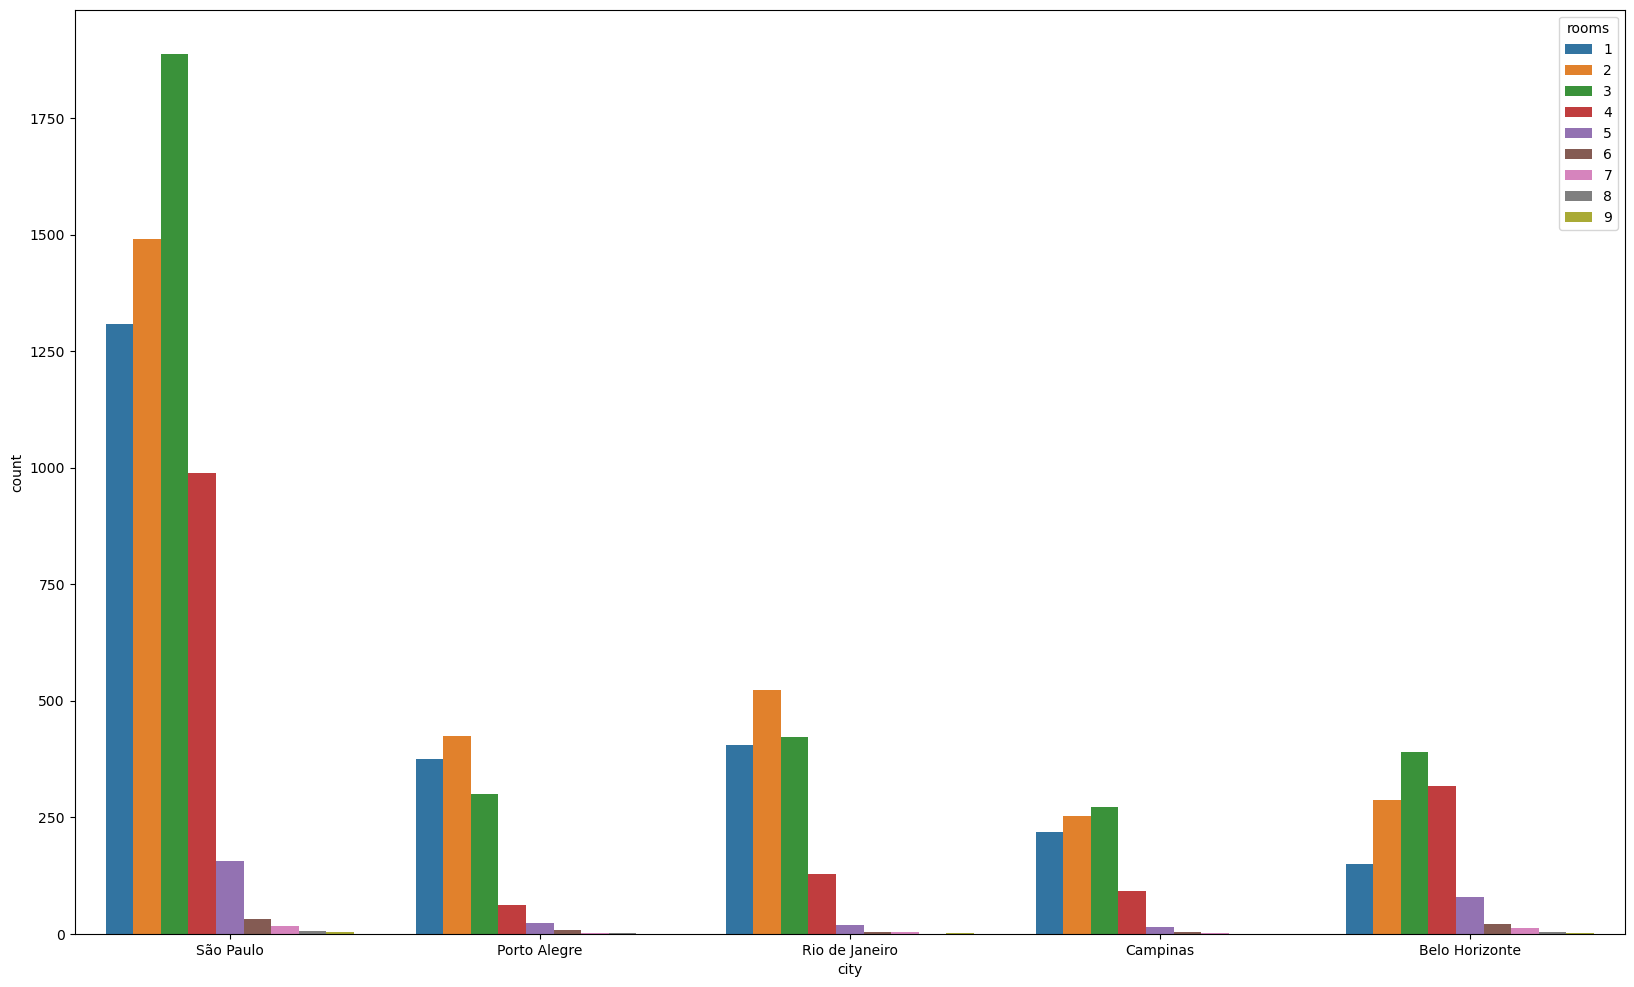

In [52]:
#city wrt rooms
fig, ax=plt.subplots(figsize=(20,12))
sns.countplot(hue= 'rooms',x='city', data=df)
plt.show()

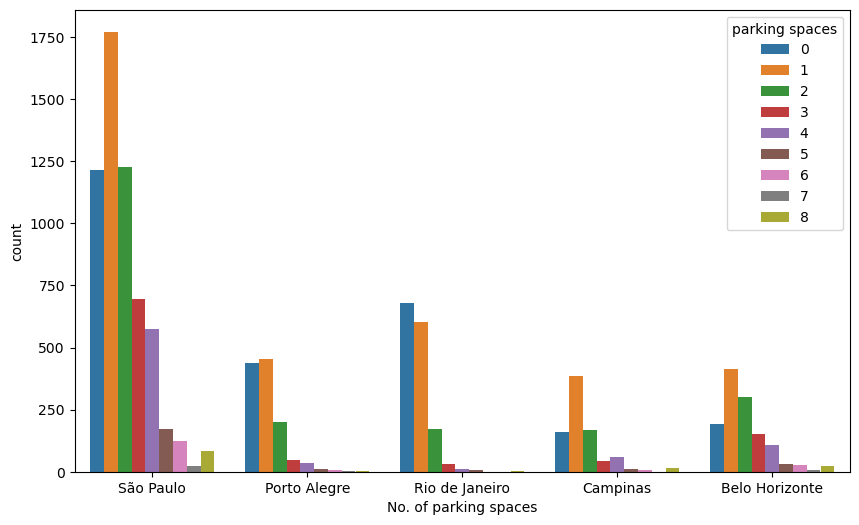

In [53]:
#city wrt parking spaces
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(hue= 'parking spaces', x='city', data=df)
plt.xlabel('No. of parking spaces')
plt.show()

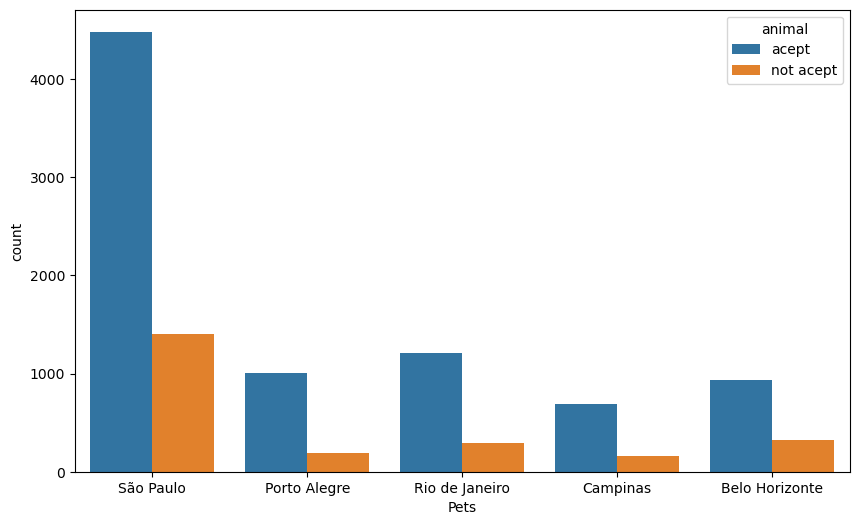

In [54]:
#city wrt animal
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(hue= 'animal', x='city', data=df)
plt.xlabel('Pets')
plt.show()

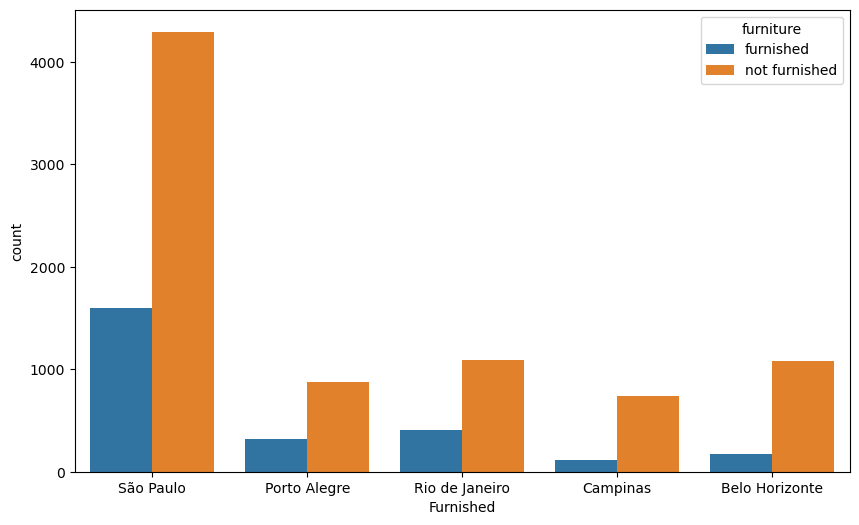

In [55]:
#city wrt furniture
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(hue= 'furniture', x='city', data=df)
plt.xlabel('Furnished')
plt.show()

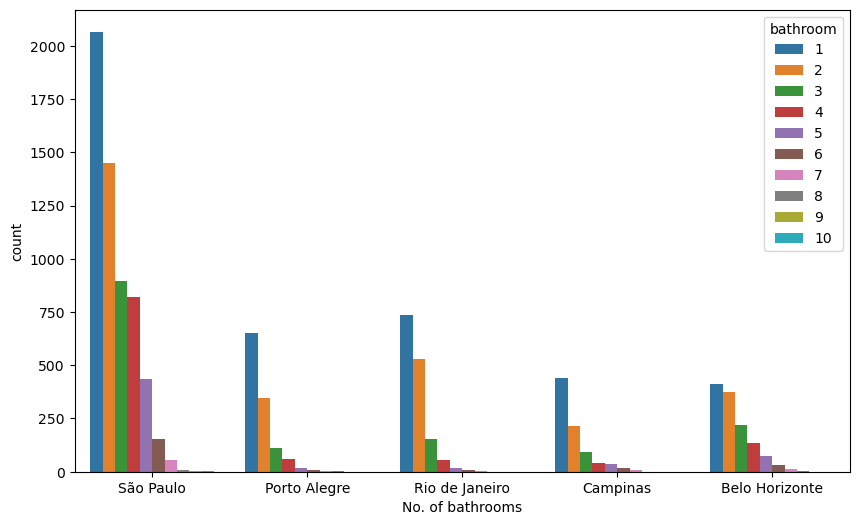

In [56]:
#city wrt bathroom
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(hue= 'bathroom', x='city', data=df)
plt.xlabel('No. of bathrooms')
plt.show()

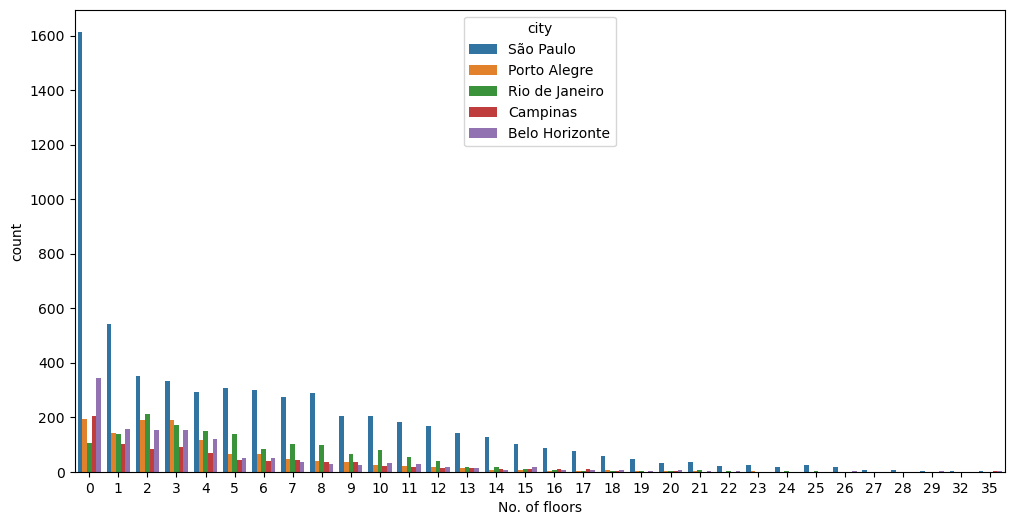

In [57]:
#city wrt floors
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x= 'floor', hue='city', data=df)
plt.xlabel('No. of floors')
plt.show()

#### Categorical and numerical

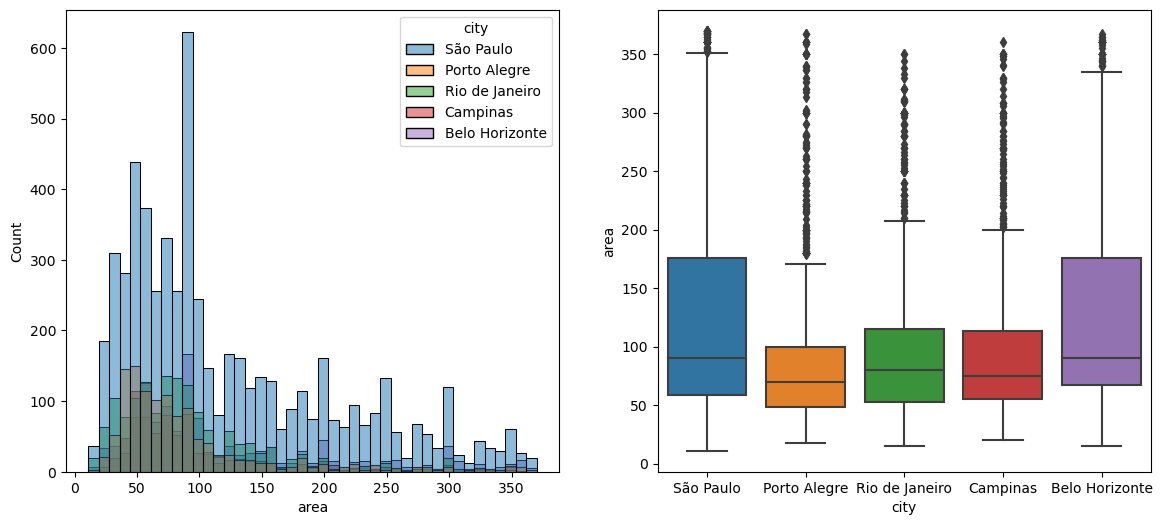

In [58]:
#city wrt area

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['area'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['area'],x=df['city'],ax=ax[1])
plt.show()

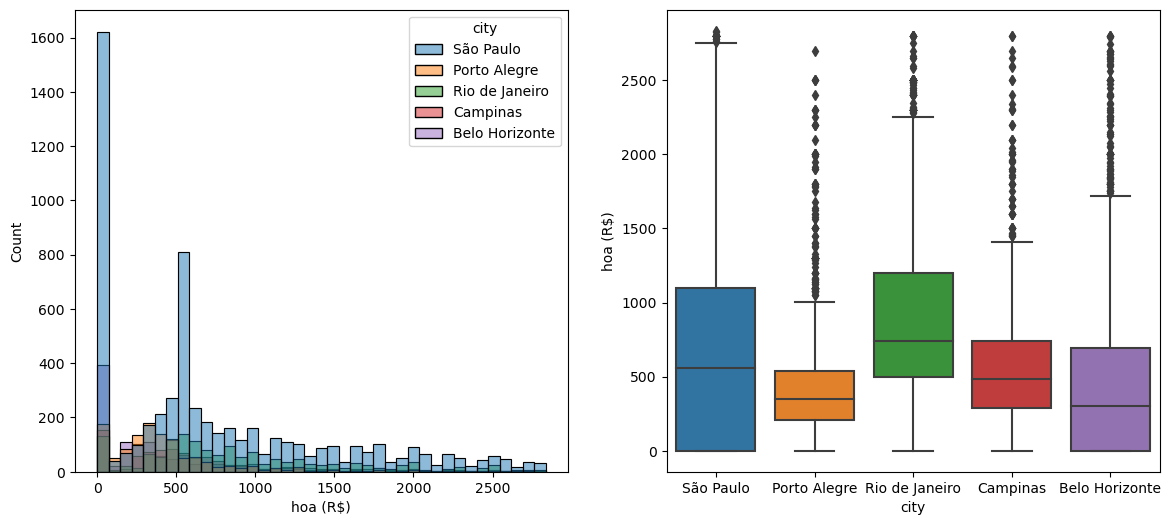

In [59]:
# city wrt hoa (R$)
fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['hoa (R$)'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['hoa (R$)'],x=df['city'],ax=ax[1])
plt.show()

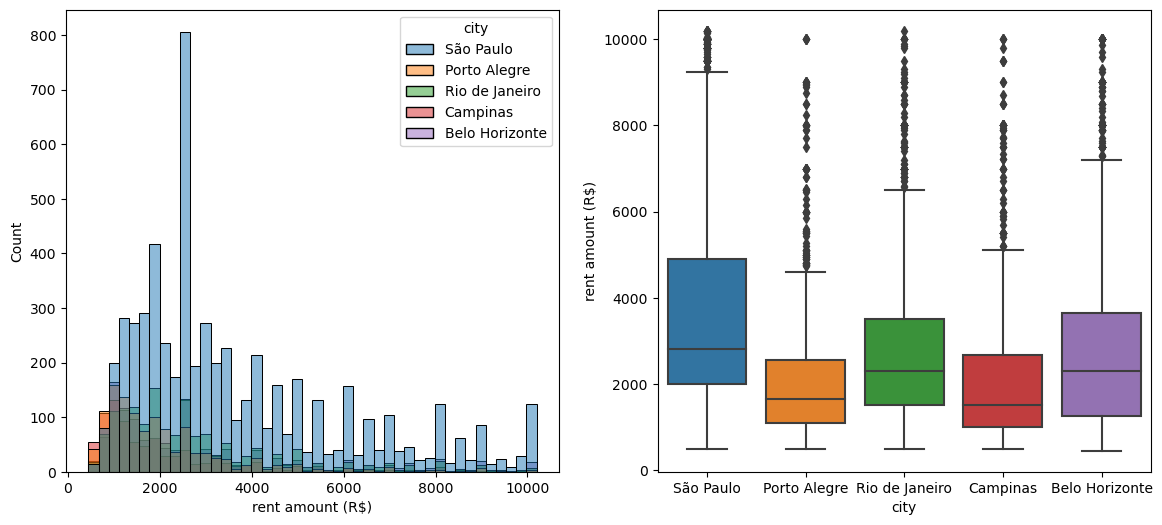

In [60]:
#city wrt rent amount (R$)

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['rent amount (R$)'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['rent amount (R$)'],x=df['city'],ax=ax[1])
plt.show()


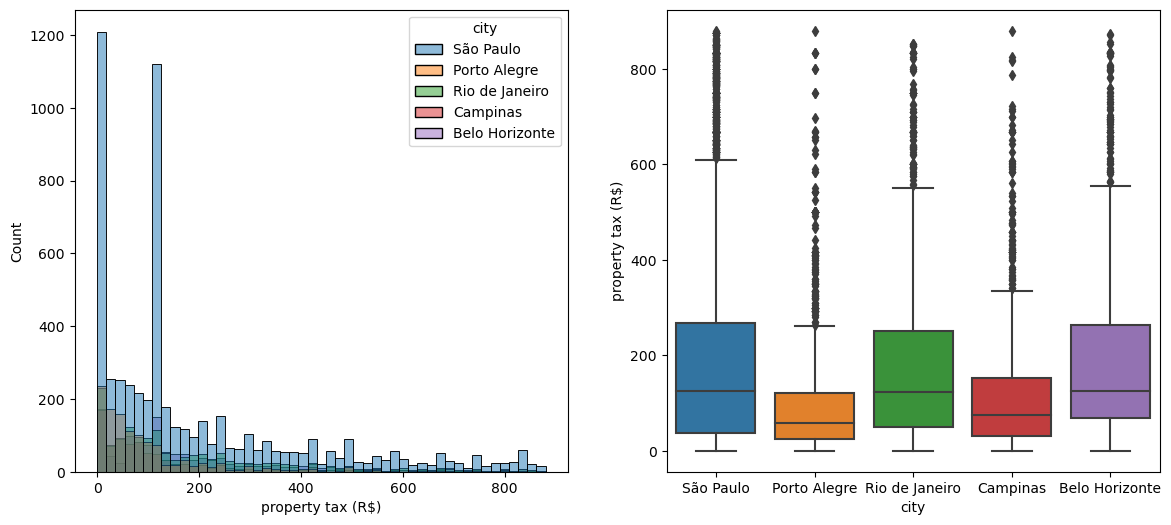

In [61]:
#city wrt property tax (R$)

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['property tax (R$)'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['property tax (R$)'],x=df['city'],ax=ax[1])
plt.show()

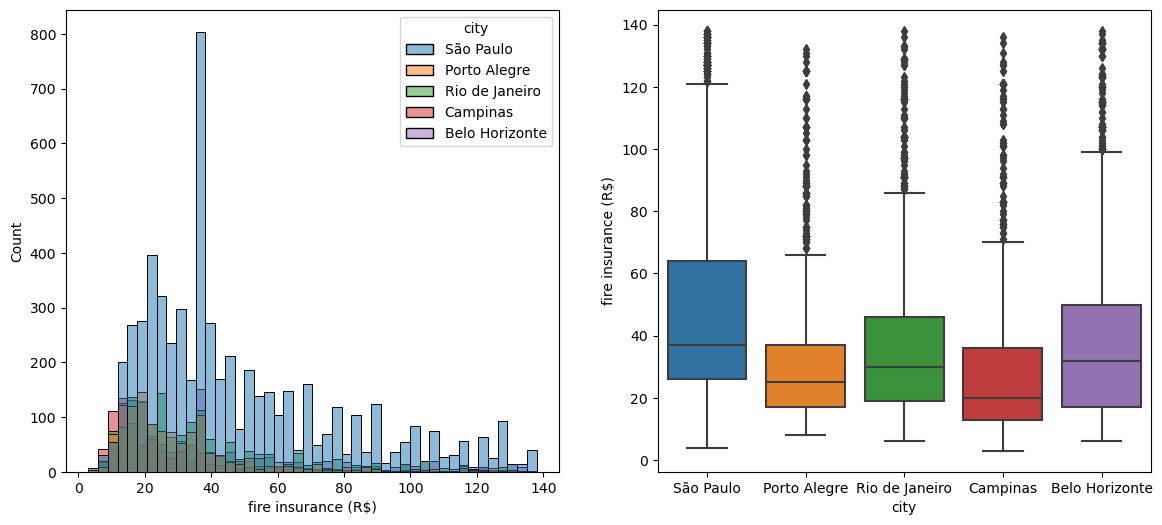

In [62]:
#city wrt fire insurance (R$)

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['fire insurance (R$)'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['fire insurance (R$)'],x=df['city'],ax=ax[1])
plt.show()

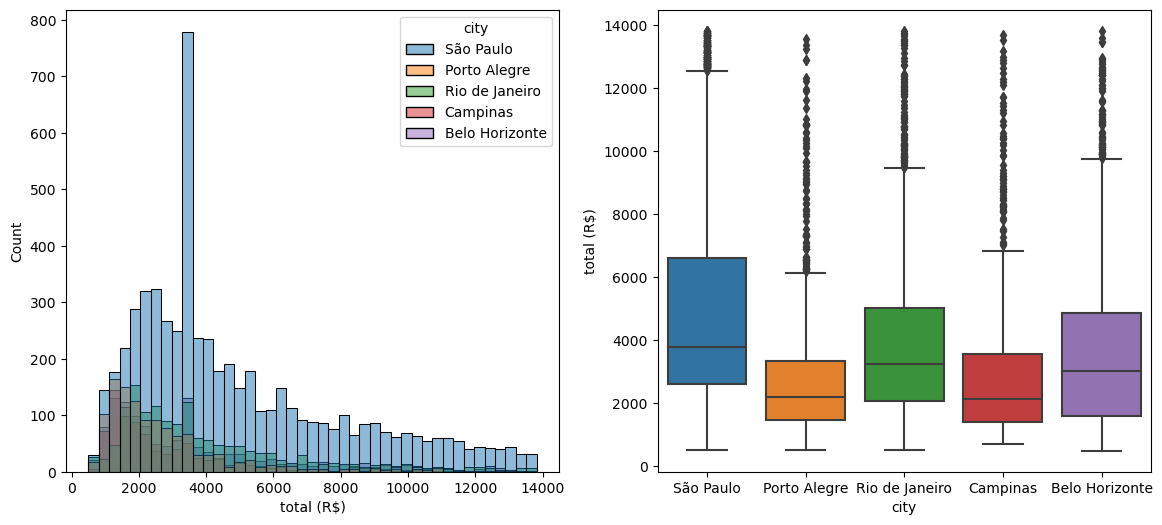

In [63]:
#city wrt total (R$)

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['total (R$)'],hue=df['city'],ax=ax[0])
sns.boxplot(y=df['total (R$)'],x=df['city'],ax=ax[1])
plt.show()

###### Among all the cities Sao paulo is the most expensive city to reside in Brazil

In [64]:
pd.pivot

<function pandas.core.reshape.pivot.pivot(data: 'DataFrame', index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, values: 'IndexLabel | None' = None) -> 'DataFrame'>

## Multivariate analysis 

In [82]:
def best_city(df):
    sns.barplot(x='total (R$)',y='city',ci=None,data=df)
    plt.show

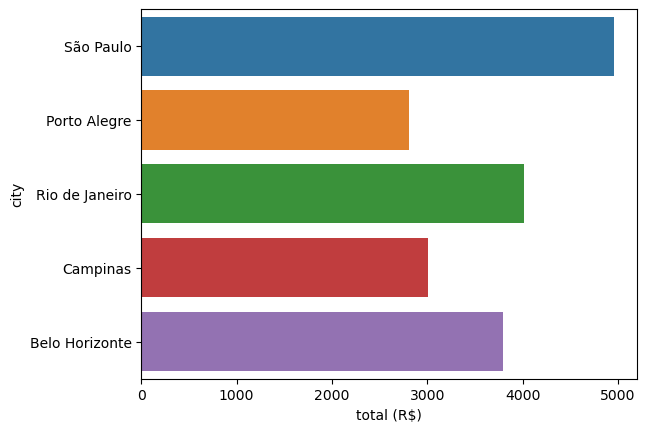

In [83]:
best_city(df)

 ##### On an overall basis  Sao paulo and Rio de Janeiro are the most expesnsive cities to reside in Brazil.

### for bachelors

#### for bachelors who want to stay alone in an unfurnished flat and no own vehicle

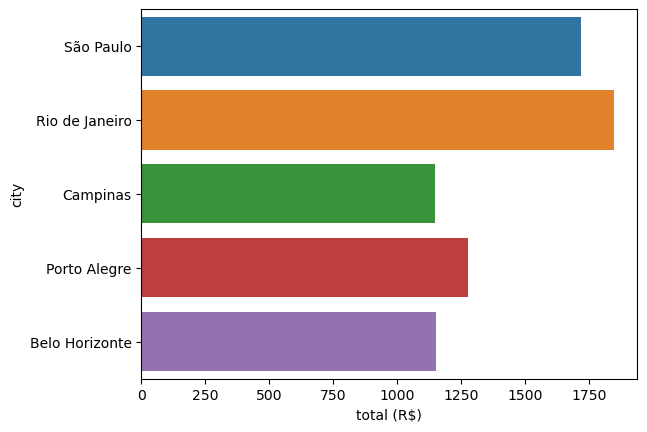

In [84]:
bcond1=(df['area']<=80)&(df['rooms']==1)&(df['furniture']=='not furnished')&(df['parking spaces']==0)
b1=df[bcond1]
best_city(b1)

#### for bachelors who want to stay alone in a furnished flat and own vehicle

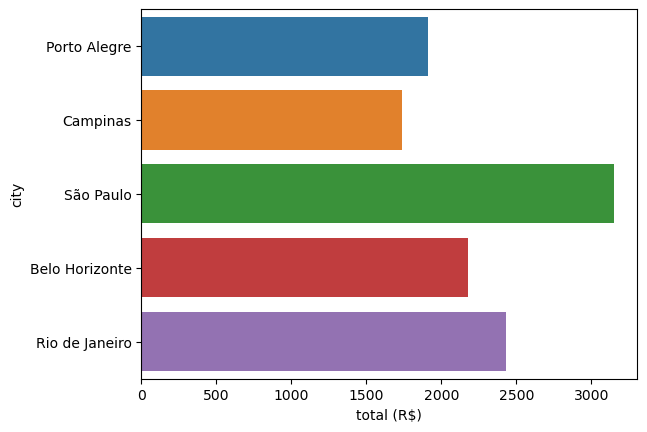

In [85]:
bcond2=(df['area']<=80)&(df['rooms']==1)&(df['furniture']=='not furnished')&(df['parking spaces']==1)
b2=df[bcond2]
best_city(b2)

#### for bachelors who want to stay alone with a single furnished room, with a pet, has own vehicle

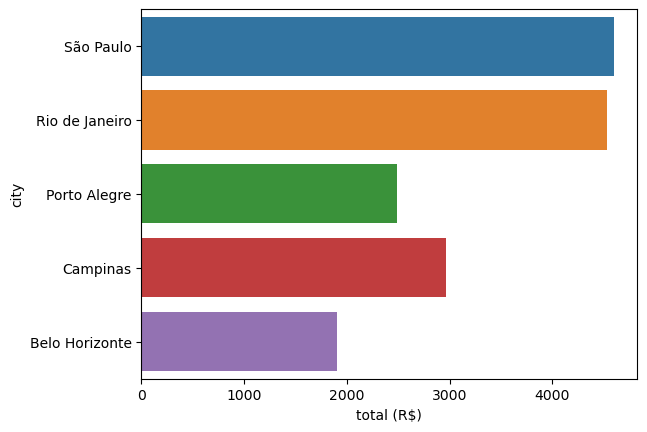

In [86]:
bcond3=(df['area']<=100)&(df['rooms']==1)&(df['furniture']=='furnished')&(df['parking spaces']==1)&(df['animal']=='acept')
b3=df[bcond3]
best_city(b3)

####  for bachelors who want to stay with a group of friends in 2-3 room flat with atleast 2 bathrooms and sufficient parking space

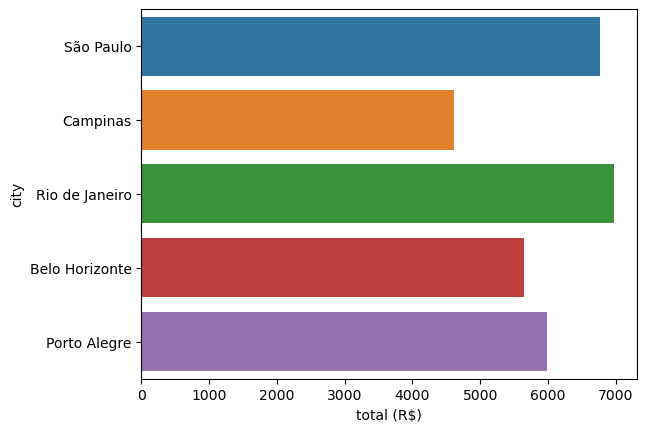

In [87]:
bcond4=(df['area']<=150)&(df['rooms']>=2)&(df['furniture']=='furnished')&(df['parking spaces']>=2)
b4=df[bcond4]
best_city(b4)

#### Campinas is the most suitable city for bachelors

### For Mid-Sized Families

#### for mid sized family with a pet ,who wants a furnished house 

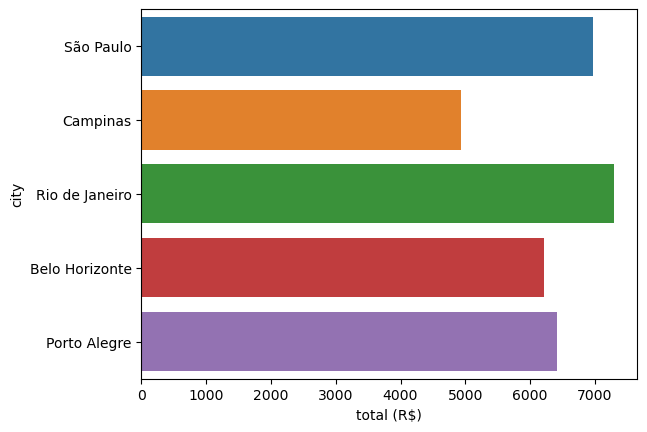

In [88]:
c1=(df['area']<=250)&(df['rooms']>=2)&(df['furniture']=='furnished')&(df['parking spaces']>=2)&(df['bathroom']>1)&(df['animal']=='acept')
mid_fam1=df[c1]
best_city(mid_fam1)

#### for families that want an unfurnished house on low level floors preferably less than 5 with no pets allowed

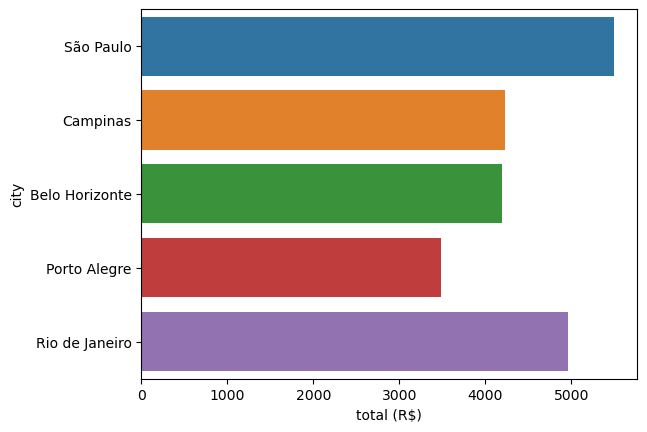

In [89]:
c2=(df['area']<=250)&(df['rooms']>=2)&(df['furniture']=='not furnished')&(df['bathroom']>1)&(df['animal']=='acept')&(df['floor']<=5)
mid_fam2=df[c2]
best_city(mid_fam2)

#### for a mid sized family that wants an house150-200sq ft area with 3 rooms ,and allows pets

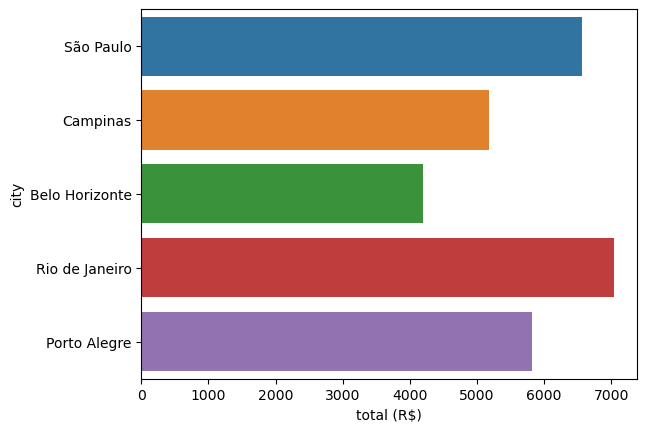

In [90]:
c3=(df['area']>=150)&(df['area']<=200)&(df['rooms']==3)&(df['bathroom']==3)&(df['animal']=='acept')
mid_fam3=df[c3]
best_city(mid_fam3)

### For large families

In [74]:
df['animal'].value_counts()

acept        8316
not acept    2376
Name: animal, dtype: int64

### house with area >=250sq ft, sufficient parking space fr atleast 3  and no pets

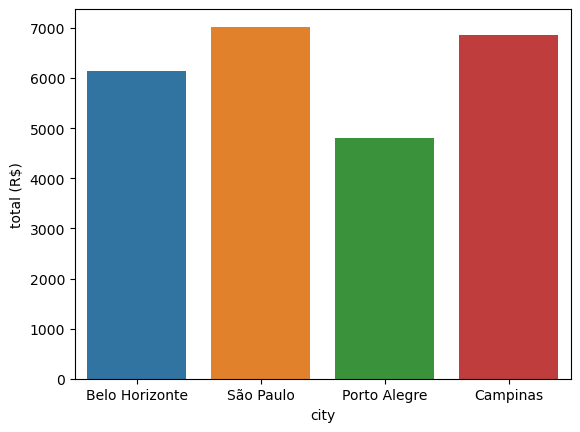

In [75]:
l1=(df['area']>=250)&(df['parking spaces']>=3)&(df['animal']=='not acept')
lfam=df[l1]
best_city(lfam)

### house with area >=300sq ft,5 rooms and allows pets


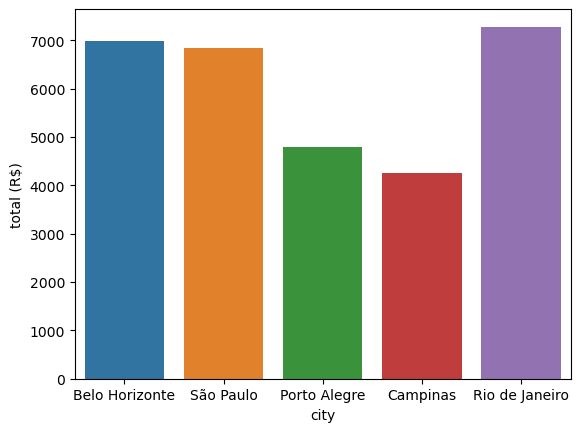

In [76]:
lf2=(df['area']>=300)&(df['rooms']==5)&(df['animal']=='acept')
lfam2=df[lf2]
best_city(lfam2)

####  Porto Alegre and Campinas are most suitable cities for families